In [157]:
# Import the required libraries and dependencies
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
# Import the MCSimulation module from the MCForecastTools library file
import numpy as np
from MCForecastTools import MCSimulation

ModuleNotFoundError: No module named 'MCForecastTools'

In [21]:
# Load .env environment variables
load_dotenv()

True

In [22]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [23]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [24]:
# Format current date as ISO format
start_date = pd.Timestamp("2020-06-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-06-05", tz="America/New_York").isoformat()

In [25]:
# Set timeframe to one day ('1Day') for the Alpaca API
timeframe = "1Day"

In [26]:
# Set the tickers
tickers = ["FB", "TWTR"]

In [27]:
# Set timeframe to one day ('1Day') for the Alpaca API
timeframe = "1Day"

In [28]:
# Get current closing prices for FB and TWTR
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_portfolio

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2020-06-01 04:00:00+00:00,224.39,232.440,223.5000,231.91,18223839,174871,229.264613,FB
2020-06-02 04:00:00+00:00,230.94,233.000,226.5600,232.72,20919029,191654,229.851235,FB
2020-06-03 04:00:00+00:00,232.39,232.650,228.5300,230.16,15380282,166039,230.239980,FB
2020-06-04 04:00:00+00:00,229.56,231.630,224.6100,226.29,17041481,180305,227.779699,FB
2020-06-05 04:00:00+00:00,226.57,231.350,225.3105,230.77,16750586,166521,229.928852,FB
2020-06-01 04:00:00+00:00,31.06,32.100,30.8400,31.89,14583619,91305,31.700367,TWTR
2020-06-02 04:00:00+00:00,32.19,32.425,31.6100,32.26,15318429,80500,32.076930,TWTR
2020-06-03 04:00:00+00:00,32.68,35.040,32.4400,34.88,28414273,153153,34.010520,TWTR
2020-06-04 04:00:00+00:00,34.49,34.940,33.3400,33.72,20106238,107081,33.960112,TWTR


In [29]:
# Separate Ticker Data
FB = df_portfolio[df_portfolio['symbol']=='FB'].drop('symbol', axis=1)
TWTR = df_portfolio[df_portfolio['symbol']=='TWTR'].drop('symbol', axis=1)

In [30]:
# Concatenate the Ticker DataFrames
df_portfolio = pd.concat([FB,TWTR],axis=1, keys=['FB','TWTR'])

In [52]:
# Display sample data
df_portfolio

FB                                      \
                             open    high       low   close    volume   
timestamp                                                               
2020-06-01 04:00:00+00:00  224.39  232.44  223.5000  231.91  18223839   
2020-06-02 04:00:00+00:00  230.94  233.00  226.5600  232.72  20919029   
2020-06-03 04:00:00+00:00  232.39  232.65  228.5300  230.16  15380282   
2020-06-04 04:00:00+00:00  229.56  231.63  224.6100  226.29  17041481   
2020-06-05 04:00:00+00:00  226.57  231.35  225.3105  230.77  16750586   

                                                    TWTR                 \
                          trade_count        vwap   open    high    low   
timestamp                                                                 
2020-06-01 04:00:00+00:00      174871  229.264613  31.06  32.100  30.84   
2020-06-02 04:00:00+00:00      191654  229.851235  32.19  32.425  31.61   
2020-06-03 04:00:00+00:00      166039  230.239980  32.68  35.040  32.44   
2020-06-04 04:00:00+00:00      180305  227.779699  34.49  34.940  33.34   
2020-06-05 04:00:00+00:00      166521  229.928852  34.52  35.970  34.47   

                                                                   
                           close    volume trade_count       vwap  
timestamp                                                          
2020-06-01 04:00:00+00:00  31.89  14583619       91305  31.700367  
2020-06-02 04:00:00+00:00  32.26  15318429       80500  32.076930  
2020-06-03 04:00:00+00:00  34.88  28414273      153153  34.010520  
2020-06-04 04:00:00+00:00  33.72  20106238      107081  33.960112  
2020-06-05 04:00:00+00:00  34.87  23211535      133449  35.232562

In [53]:
fb_close = df_portfolio["FB"]["close"]

In [54]:
fb_close

timestamp
2020-06-01 04:00:00+00:00    231.91
2020-06-02 04:00:00+00:00    232.72
2020-06-03 04:00:00+00:00    230.16
2020-06-04 04:00:00+00:00    226.29
2020-06-05 04:00:00+00:00    230.77
Name: close, dtype: float64

In [55]:
twtr_close = df_portfolio["TWTR"]["low"]
twtr_close

timestamp
2020-06-01 04:00:00+00:00    30.84
2020-06-02 04:00:00+00:00    31.61
2020-06-03 04:00:00+00:00    32.44
2020-06-04 04:00:00+00:00    33.34
2020-06-05 04:00:00+00:00    34.47
Name: low, dtype: float64

In [56]:
# Create an empty DataFrame for closing prices
closing_prices_df = pd.DataFrame()

In [57]:
# Get the closing prices of FB and TWTR
closing_prices_df["FB"] = df_portfolio["FB"]["close"]
closing_prices_df["TWTR"] = df_portfolio["TWTR"]["close"]

In [58]:
# Drop the time component of the date
closing_prices_df.index = closing_prices_df.index.date

In [59]:
# Display sample data
closing_prices_df.head(10)

,FB,TWTR
2020-06-01,231.91,31.89
2020-06-02,232.72,32.26
2020-06-03,230.16,34.88
2020-06-04,226.29,33.72
2020-06-05,230.77,34.87


In [60]:
# Compute daily returns
daily_returns_df = closing_prices_df.pct_change().dropna()

In [61]:
# Display sample data
daily_returns_df.head(10)


,FB,TWTR
2020-06-02,0.003493,0.011602
2020-06-03,-0.011000,0.081215
2020-06-04,-0.016814,-0.033257
2020-06-05,0.019798,0.034104


<AxesSubplot:title={'center':'Daily Returns of FB and TWTR - June 2020'}>

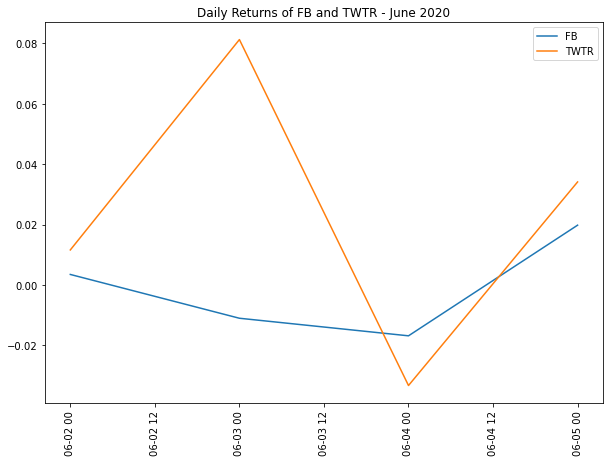

In [62]:
# Plot daily returns
daily_returns_df.plot(figsize=(10, 7), title="Daily Returns of FB and TWTR - June 2020", rot=90)

In [112]:
# Set the Tesla and Coca-Cola ticker symbols
tickers = ["TSLA","KO","ZM"]

In [113]:
# Set timeframe to '1Day'
timeframe = "1Day"

In [114]:
# Set start and end datetimes of 1 year, between now and 365 days ago.
start_date = pd.Timestamp("2019-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()

In [115]:
# Get 1 year's worth of historical data for Tesla and Coca-Cola
prices_df = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

In [116]:
# Reorganize the DataFrame
# Separate ticker data
TSLA = prices_df[prices_df['symbol']=='TSLA'].drop('symbol', axis=1)
KO = prices_df[prices_df['symbol']=='KO'].drop('symbol', axis=1)
ZM = prices_df[prices_df['symbol']=='ZM'].drop('symbol', axis=1)

In [117]:
# Concatenate the ticker DataFrames
prices_df = pd.concat([TSLA, KO, ZM], axis=1, keys=["TSLA", "KO", "ZM"])

In [119]:
# Display sample data
display(prices_df.head())
display(prices_df.tail())

TSLA                                      \
                             open      high     low   close    volume   
timestamp                                                               
2019-05-01 04:00:00+00:00  238.85  240.0000  231.50  234.01  10704355   
2019-05-02 04:00:00+00:00  245.65  247.1300  237.72  244.10  18167261   
2019-05-03 04:00:00+00:00  244.00  256.6100  243.49  255.03  23740838   
2019-05-06 04:00:00+00:00  250.00  258.3499  248.50  255.34  10860343   
2019-05-07 04:00:00+00:00  256.80  257.2100  245.10  247.06  10261408   

                                                      KO                  ...  \
                          trade_count        vwap   open     high    low  ...   
timestamp                                                                 ...   
2019-05-01 04:00:00+00:00      108382  234.544288  48.95  49.0750  48.55  ...   
2019-05-02 04:00:00+00:00      173521  242.763484  48.53  48.7657  48.27  ...   
2019-05-03 04:00:00+00:00      205076  252.330502  48.60  48.9600  48.52  ...   
2019-05-06 04:00:00+00:00       93066  254.021222  48.33  48.6100  48.26  ...   
2019-05-07 04:00:00+00:00      103693  249.863277  48.23  48.2900  47.77  ...   

                                                               ZM         \
                             volume trade_count       vwap   open   high   
timestamp                                                                  
2019-05-01 04:00:00+00:00  10551594       55430  48.792137  72.72  76.95   
2019-05-02 04:00:00+00:00   8724932       49477  48.453170  72.75  75.89   
2019-05-03 04:00:00+00:00   7076949       39003  48.773171  75.00  80.25   
2019-05-06 04:00:00+00:00   8658209       44597  48.465858  75.01  80.79   
2019-05-07 04:00:00+00:00  12487481       59828  48.012280  77.85  78.05   

                                                                           
                               low  close   volume trade_count       vwap  
timestamp                                                                  
2019-05-01 04:00:00+00:00  70.8159  72.76  3301900       24222  74.231378  
2019-05-02 04:00:00+00:00  69.6912  75.50  2525585       18048  72.558908  
2019-05-03 04:00:00+00:00  75.0000  79.18  2590281       20668  78.298907  
2019-05-06 04:00:00+00:00  74.5000  78.24  2051824       20419  78.125513  
2019-05-07 04:00:00+00:00  73.2500  73.33  1975220       19517  75.579497  

[5 rows x 21 columns]

TSLA                                      \
                             open      high     low   close    volume   
timestamp                                                               
2020-04-27 04:00:00+00:00  737.61  799.4900  735.00  798.75  20681442   
2020-04-28 04:00:00+00:00  795.30  805.0000  756.69  769.12  15222719   
2020-04-29 04:00:00+00:00  791.68  803.1999  783.16  800.51  16215982   
2020-04-30 04:00:00+00:00  855.00  869.8200  763.50  781.88  28471861   
2020-05-01 04:00:00+00:00  755.00  772.7700  683.04  701.32  32531807   

                                                      KO                 ...  \
                          trade_count        vwap   open    high    low  ...   
timestamp                                                                ...   
2020-04-27 04:00:00+00:00      433976  783.972936  46.00  46.975  45.71  ...   
2020-04-28 04:00:00+00:00      313311  776.861887  47.90  48.000  46.57  ...   
2020-04-29 04:00:00+00:00      369253  806.509262  47.20  47.860  46.88  ...   
2020-04-30 04:00:00+00:00      615141  814.176323  46.80  47.000  45.70  ...   
2020-05-01 04:00:00+00:00      728692  719.404683  45.62  46.390  45.21  ...   

                                                                ZM          \
                             volume trade_count       vwap    open    high   
timestamp                                                                    
2020-04-27 04:00:00+00:00  19175538      124750  46.501889  156.40  167.85   
2020-04-28 04:00:00+00:00  17246696      119237  47.136381  165.00  166.00   
2020-04-29 04:00:00+00:00  15780000      112218  47.381482  148.00  151.00   
2020-04-30 04:00:00+00:00  20801092      142157  46.036240  140.00  143.80   
2020-05-01 04:00:00+00:00  14290418      104457  45.640609  135.67  141.63   

                                                                               
                                low   close    volume trade_count        vwap  
timestamp                                                                      
2020-04-27 04:00:00+00:00  155.0000  164.60  19783693      195792  162.902187  
2020-04-28 04:00:00+00:00  155.2500  156.72  13477842      147692  159.360586  
2020-04-29 04:00:00+00:00  143.3800  146.48  22033690      219146  146.850471  
2020-04-30 04:00:00+00:00  133.6801  135.17  16682256      190729  137.123321  
2020-05-01 04:00:00+00:00  132.6700  138.56  13806992      150701  136.933247  

[5 rows x 21 columns]

In [120]:
# Create an empty `closing_prices_df` DataFrame using Pandas
closing_prices_df = pd.DataFrame()

In [121]:
# Populate the `closing_prices_df` DataFrame by accessing the `close` column
# from the `prices_df` DataFrame for both KO and TSLA .
closing_prices_df["KO"] = prices_df["KO"]["close"]
closing_prices_df["TSLA"] = prices_df["TSLA"]["close"]

In [122]:
# Update the index for the `closing_prices_df` DataFrame
# to retain only the `date` component.
closing_prices_df.index = closing_prices_df.index.date

In [123]:
# Compute the `daily_returns_df` DataFrame by chaining
# the pct_change function with the dropna function.
daily_returns_df = closing_prices_df.pct_change().dropna()

In [124]:
# Display both the head and tail of the `daily_returns_df` DataFrame
display(daily_returns_df.head())
display(daily_returns_df.tail())

,KO,TSLA
2019-05-02,-0.004116,0.043118
2019-05-03,0.006820,0.044777
2019-05-06,-0.005131,0.001216
2019-05-07,-0.009697,-0.032427
2019-05-08,-0.003125,-0.008986


,KO,TSLA
2020-04-27,0.029716,0.101496
2020-04-28,-0.000855,-0.037095
2020-04-29,0.008130,0.040813
2020-04-30,-0.026104,-0.023273
2020-05-01,-0.006319,-0.103034


In [125]:
#Next, to get an overview of the distribution of these values, we’ll generate summary statistics

In [126]:
# Generate summary statistics for the `daily_returns_df` DataFrame
daily_returns_df.describe()

,KO,TSLA
count,253.000000,253.000000
mean,-0.000056,0.005515
std,0.019682,0.048388
min,-0.096725,-0.185778
25%,-0.006709,-0.011681
50%,0.000192,0.004019
75%,0.006820,0.024596
max,0.064796,0.198949


In [127]:
# focus on in the summary statistics is the standard deviation (std).
# A large standard deviation indicates that values lie further away from the mean. 

In [128]:
#Plot the Probability Distribution
#We visualize a probability distribution by plotting a Pandas histogram.
#A histogram is a visualization that displays how often the different values appear in a DataFrame.

<AxesSubplot:title={'center':'TSLA Probability Distribution'}, ylabel='Frequency'>

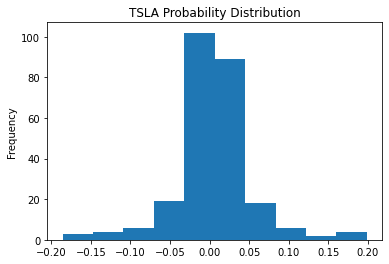

In [129]:
# Visualize distribution of Tesla percent change in closing price using a histogram plot
daily_returns_df["TSLA"].plot.hist(title='TSLA Probability Distribution')

<AxesSubplot:title={'center':'KO Probability Distribution'}, ylabel='Frequency'>

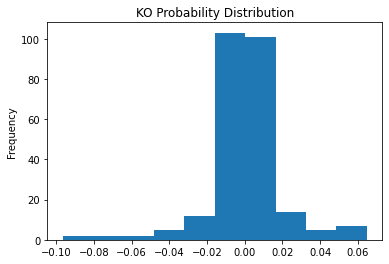

In [130]:
# Visualize distribution of Coca-Cola percent change in closing price using a histogram plot
daily_returns_df["KO"].plot.hist(title='KO Probability Distribution')

<AxesSubplot:title={'center':'Density Plot for KO & TSLA'}, ylabel='Density'>

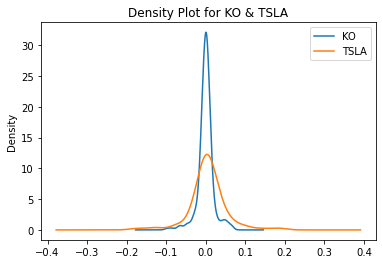

In [131]:
# Visualize the distribution of daily returns data for both KO and TSLA
# by calling the plot.density function on the daily_returns_df DataFrame.
daily_returns_df.plot.density(title='Density Plot for KO & TSLA')

In [132]:
# Create an empty `closing_prices_df` DataFrame using Pandas
closing_prices_df = pd.DataFrame()

In [133]:
# Populate the `closing_prices_df` DataFrame by accessing the `close` column
# from the `prices_df` DataFrame for both KO and TSLA .
closing_prices_df["ZM"] = prices_df["ZM"]["close"]


In [134]:
# Update the index for the `closing_prices_df` DataFrame
# to retain only the `date` component.
closing_prices_df.index = closing_prices_df.index.date

In [135]:
# Compute the `daily_returns_df` DataFrame by chaining
# the pct_change function with the dropna function.
daily_returns_df = closing_prices_df.pct_change().dropna()

In [136]:
# Display both the head and tail of the `daily_returns_df` DataFrame
display(daily_returns_df.head())
display(daily_returns_df.tail())

,ZM
2019-05-02,0.037658
2019-05-03,0.048742
2019-05-06,-0.011872
2019-05-07,-0.062756
2019-05-08,0.059321


,ZM
2020-04-27,0.036524
2020-04-28,-0.047874
2020-04-29,-0.065339
2020-04-30,-0.077212
2020-05-01,0.025080


In [146]:
# Generate descriptive statistics
daily_returns_df.describe()



,ZM
count,253.000000
mean,0.003493
std,0.043875
min,-0.152795
25%,-0.017709
50%,0.000965
75%,0.021675
max,0.222214


<AxesSubplot:title={'center':'Zoom Probability Distribution'}, ylabel='Frequency'>

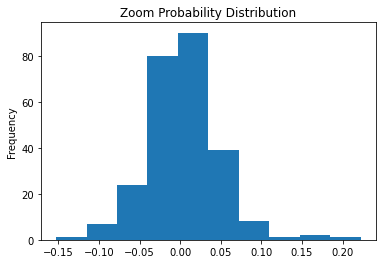

In [147]:
# Visualize distribution of Zoom percent change in closing price using a histogram plot
daily_returns_df["ZM"].plot(kind='hist', title='Zoom Probability Distribution')

In [154]:
MCForecastTools.py

NameError: name 'MCForecastTools' is not defined

In [153]:
# Import the MCSimulation module from the MCForecastTools library file
from MCForecastTools import MCSimulation

ModuleNotFoundError: No module named 'MCForecastTools'

In [149]:
# Print the documentation of the MCSimulation module of the MCForecastTools library
?MCSimulation

Object `MCSimulation` not found.
